# Tugas Besar 2 IF3170 - Intelegensi Buatan
## Kelompok Butuh Passingan
### Nama Anggota :
1. Andreas Halim - 13516003
2. Aldo Azali - 13516125
3. Untung Tanujaya - 13516135
4. Dafi Faraz - 13516XXX
5. Jeffry - 13516156

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df = pd.read_csv('tubes2_HeartDisease_train.csv', na_values='?')
dg = pd.read_csv('tubes2_HeartDisease_test.csv', na_values='?')
df.shape

(779, 14)

In [101]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [102]:
df.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal', 'Diagnosis_HD']
dg.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal']

In [103]:
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


## Data Preprocessing

### Add some description to data

In [104]:
df['Sex'] = df['Sex'].replace(1, 'Male')
df['Sex'] = df['Sex'].replace(0, 'Female')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(1, 'Typical_Angina')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(2, 'Atypical_Angina')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(3, 'Non-Anginal_Pain')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(4, 'Asymptotic')
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(1, True)
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(0, False)
df['resting_ECG'] = df['resting_ECG'].replace(0, 'normal')
df['resting_ECG'] = df['resting_ECG'].replace(1, 'having_ST-T_wave_abnormality')
df['resting_ECG'] = df['resting_ECG'].replace(2, 'left_ventricular_hyperthrophy')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(1, 'YES')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(0, 'NO')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(1, 'upsloping')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(2, 'flat')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(3, 'downsloping')
df['Thal'] = df['Thal'].replace(3, 'normal')
df['Thal'] = df['Thal'].replace(6, 'fixed_defect')
df['Thal'] = df['Thal'].replace(7, 'reversable_defect')
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,Male,Asymptotic,125.0,216.0,False,normal,140.0,NO,0.0,NaN,NaN,NaN,1
1,55,Male,Asymptotic,158.0,217.0,False,normal,110.0,YES,2.5,flat,NaN,NaN,1
2,54,Female,Non-Anginal_Pain,135.0,304.0,True,normal,170.0,NO,0.0,upsloping,0.0,normal,0
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,NaN,NaN,NaN,0
4,50,Male,Asymptotic,120.0,0.0,False,having_ST-T_wave_abnormality,156.0,YES,0.0,upsloping,NaN,fixed_defect,3


In [105]:
dg['Sex'] = df['Sex'].replace(1, 'Male')
dg['Sex'] = df['Sex'].replace(0, 'Female')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(1, 'Typical_Angina')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(2, 'Atypical_Angina')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(3, 'Non-Anginal_Pain')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(4, 'Asymptotic')
dg['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(1, True)
dg['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(0, False)
dg['resting_ECG'] = df['resting_ECG'].replace(0, 'normal')
dg['resting_ECG'] = df['resting_ECG'].replace(1, 'having_ST-T_wave_abnormality')
dg['resting_ECG'] = df['resting_ECG'].replace(2, 'left_ventricular_hyperthrophy')
dg['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(1, 'YES')
dg['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(0, 'NO')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(1, 'upsloping')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(2, 'flat')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(3, 'downsloping')
dg['Thal'] = df['Thal'].replace(3, 'normal')
dg['Thal'] = df['Thal'].replace(6, 'fixed_defect')
dg['Thal'] = df['Thal'].replace(7, 'reversable_defect')
dg.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
0,60,Male,Asymptotic,160.0,267.0,False,normal,157.0,NO,0.5,NaN,NaN,NaN
1,61,Male,Asymptotic,148.0,203.0,False,normal,161.0,YES,0.0,flat,1.0,NaN
2,54,Female,Non-Anginal_Pain,130.0,242.0,True,normal,91.0,NO,1.0,upsloping,NaN,normal
3,48,Female,Non-Anginal_Pain,120.0,260.0,False,normal,115.0,NO,2.0,NaN,NaN,NaN
4,57,Male,Asymptotic,130.0,308.0,False,having_ST-T_wave_abnormality,98.0,YES,1.0,upsloping,NaN,fixed_defect


## Data Analysis with graphic

c:\users\aldo azali\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


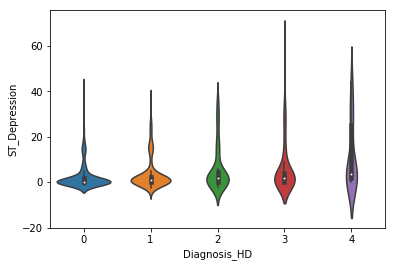

In [106]:
# "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
sns.violinplot(x=df['Diagnosis_HD'], y=df['ST_Depression'])

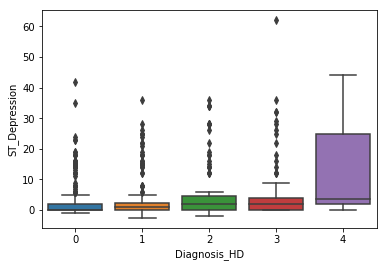

In [107]:
# "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
sns.boxplot(x=df['Diagnosis_HD'], y=df['ST_Depression'])

In [108]:
df['ST_Depression'].unique()

array([ 0. ,  2.5,  2. ,  4. ,  0.5,  8. ,  1.5, 12. ,  nan,  6. ,  1. ,
        3. ,  2.6, 14. ,  2.2, 25. , 32. , 36. ,  1.1, 28. , -0.5, 18. ,
        0.7, 29. ,  1.8, 34. ,  1.4, 15. , 16. ,  0.1, 26. , 42. ,  5. ,
        0.3,  1.3,  0.8,  1.6,  9. , 11. , 22. , -0.7, 21. , -1.5,  0.4,
       38. , 24. , -0.8, 19. ,  3.5,  2.1, 23. , -1.1, 13. , -2.6,  0.2,
       -0.1, -0.9, 44. ,  2.4,  0.9, -2. , 62. ,  7. , 35. ,  1.7,  2.8,
       -1. ])

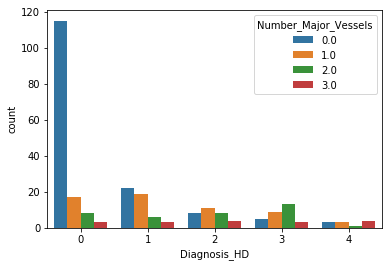

In [109]:
# "Chest-Pain_Type" , -resting_ECG- ,"Peak_Exercise" , "Thal"  , "Number_Major_Vessels", Fasting_Blood_Sugar_120, "Exercise_Induced_Angina"
sns.countplot(x=df['Diagnosis_HD'], hue=df['Number_Major_Vessels'])

### Check Null Values
If there is null values, then change it to :
1. Median
2. dummy value (ex : 'Empty' OR '?')
3. mode

In [110]:
df.isnull().sum()

Age                          0
Sex                          0
Chest-Pain_Type              0
Resting_Blood_Pressure      47
Serum_Cholestrol            24
Fasting_Blood_Sugar_120     78
resting_ECG                  2
Max-Heart_Rate_Achieved     44
Exercise_Induced_Angina     44
ST_Depression               49
Peak_Exercise              262
Number_Major_Vessels       514
Thal                       408
Diagnosis_HD                 0
dtype: int64

In [111]:
# RBP, SC, MHRA, STD,  = median
# FBS, ecg, EIA, pe, NMV, thal = mode
# fbs, ECG , eia, PE,nmv, THAL = 'Empty'
rbp_med = df['Resting_Blood_Pressure'].median()
sc_med = df['Serum_Cholestrol'].median()
mhra_med = df['Max-Heart_Rate_Achieved'].median()
std_med = df['ST_Depression'].median()

In [112]:
# Fill with median
df['Resting_Blood_Pressure'] = df['Resting_Blood_Pressure'].fillna(rbp_med)
df['Serum_Cholestrol'] = df['Serum_Cholestrol'].fillna(sc_med)
df['Max-Heart_Rate_Achieved'] = df['Max-Heart_Rate_Achieved'].fillna(mhra_med)
df['ST_Depression'] = df['ST_Depression'].fillna(std_med)
# Others Fill with '?'
df = df.fillna('?')

In [113]:
rbp_medg = dg['Resting_Blood_Pressure'].median()
sc_medg = dg['Serum_Cholestrol'].median()
mhra_medg = dg['Max-Heart_Rate_Achieved'].median()
std_medg = dg['ST_Depression'].median()

In [114]:
# Fill with median
dg['Resting_Blood_Pressure'] = dg['Resting_Blood_Pressure'].fillna(rbp_medg)
dg['Serum_Cholestrol'] = dg['Serum_Cholestrol'].fillna(sc_medg)
dg['Max-Heart_Rate_Achieved'] = dg['Max-Heart_Rate_Achieved'].fillna(mhra_medg)
dg['ST_Depression'] = dg['ST_Depression'].fillna(std_medg)
# Others Fill with '?'
dg = dg.fillna('?')

In [115]:
dg.isnull().sum()

Age                        0
Sex                        0
Chest-Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholestrol           0
Fasting_Blood_Sugar_120    0
resting_ECG                0
Max-Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Peak_Exercise              0
Number_Major_Vessels       0
Thal                       0
dtype: int64

### Create Data Split Train and Data Split Test(90:10)

In [143]:
from scipy.stats import ttest_ind

In [144]:
y_train = df['Diagnosis_HD']  # yang ingin diprediksi
X_train = df.drop(['Diagnosis_HD'], axis = 1)

In [189]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.2, random_state = 123)
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
119,49,Male,Non-Anginal_Pain,115.0,265.0,False,normal,175.0,NO,0.0,?,?,?
221,40,Male,Non-Anginal_Pain,140.0,225.0,False,normal,188.0,NO,0.0,?,?,?
316,68,Male,Non-Anginal_Pain,150.0,195.0,True,normal,132.0,NO,0.0,?,?,fixed_defect
274,57,Female,Atypical_Angina,130.0,236.0,False,left_ventricular_hyperthrophy,174.0,NO,0.0,flat,1,normal
648,54,Female,Asymptotic,127.0,333.0,True,having_ST-T_wave_abnormality,154.0,NO,0.0,?,?,?


In [190]:
# # from imblearn.over_sampling import SMOTE # only integers
# # sm = SMOTE(random_state=12, ratio = 1.0)
# from imblearn.over_sampling import RandomOverSampler   #  -> Worse
# ros = RandomOverSampler(random_state = 12)
# # from imblearn.over_sampling import ADASYN
# X_train_res, y_train_res = ros.fit_resample(X_train_split, y_train_split)

In [191]:
# X_train_split = pd.DataFrame(X_train_res)
# X_train_split.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
#        'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
#        'Thal']
# y_train_split = pd.DataFrame(y_train_res)
# y_train_split.columns = ['Diagnosis_HD']
# X_train_split.shape

In [192]:
X_train_split['Serum_Cholestrol'].unique()

array([265., 225., 195., 236., 333., 216., 321., 192., 320.,   0., 305.,
       208., 129., 315., 241., 306., 353., 226., 275., 303., 209., 466.,
       126., 206., 224., 277., 276., 232., 230., 318., 258., 177., 365.,
       233., 211., 221., 264., 248., 182., 235., 197., 215., 231., 214.,
       308., 249., 218., 220., 295., 328., 238., 160., 268., 219., 273.,
       187., 309., 287., 161., 228., 207., 341., 200., 289., 174., 290.,
       198., 213., 283., 164., 316., 330., 117., 285., 247., 193., 263.,
       255., 186., 179., 325., 180., 280., 240., 369., 279., 291., 294.,
       260., 269., 246., 281., 282., 237., 256., 253., 234., 243., 194.,
       223., 184., 310., 244., 312., 259., 284., 297., 245., 100., 229.,
       360., 393., 205., 222., 204., 201., 298., 288., 190., 173., 252.,
       227., 261., 202., 153., 270., 157., 199., 257., 274., 262., 141.,
       266., 139., 394., 404., 271., 355., 250., 407., 304., 322., 251.,
       358., 142., 337., 292., 171., 254., 203., 27

In [193]:
# # "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
# X_train_split['Age'] = pd.to_numeric(X_train_split['Age'])
# X_train_split['Resting_Blood_Pressure'] = pd.to_numeric(X_train_split['Resting_Blood_Pressure'])
# X_train_split['Serum_Cholestrol'] = pd.to_numeric(X_train_split['Serum_Cholestrol'])
# X_train_split['Max-Heart_Rate_Achieved'] = pd.to_numeric(X_train_split['Max-Heart_Rate_Achieved'])
# X_train_split['ST_Depression'] = pd.to_numeric(X_train_split['ST_Depression'])

### Create Data Full Train and Data Test

In [194]:
#TBD

## Data Processing

### Feature Engineering

In [195]:
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
119,49,Male,Non-Anginal_Pain,115.0,265.0,False,normal,175.0,NO,0.0,?,?,?
221,40,Male,Non-Anginal_Pain,140.0,225.0,False,normal,188.0,NO,0.0,?,?,?
316,68,Male,Non-Anginal_Pain,150.0,195.0,True,normal,132.0,NO,0.0,?,?,fixed_defect
274,57,Female,Atypical_Angina,130.0,236.0,False,left_ventricular_hyperthrophy,174.0,NO,0.0,flat,1,normal
648,54,Female,Asymptotic,127.0,333.0,True,having_ST-T_wave_abnormality,154.0,NO,0.0,?,?,?


In [196]:
# Drop Resting_Blood_Pressure --> Make Predict worser
# X_train_split = X_train_split.drop(['Resting_Blood_Pressure'], axis = 1)
# X_test_split = X_test_split.drop(['Resting_Blood_Pressure'], axis = 1)

In [197]:
# # Change y_train_split = [0,1,2,3,4] to y_train_split1 = [true, false]
# y_train_split1 = y_train_split
# y_train_split1 = y_train_split1.replace[0,False]

### Make Dummies

In [198]:
X_train_split = pd.get_dummies(X_train_split)
X_test_split = pd.get_dummies(X_test_split)

In [199]:
X_train_split.head()

,Age,Resting_Blood_Pressure,Serum_Cholestrol,Max-Heart_Rate_Achieved,ST_Depression,Sex_Female,Sex_Male,Chest-Pain_Type_Asymptotic,Chest-Pain_Type_Atypical_Angina,Chest-Pain_Type_Non-Anginal_Pain,...,Peak_Exercise_upsloping,Number_Major_Vessels_0.0,Number_Major_Vessels_1.0,Number_Major_Vessels_2.0,Number_Major_Vessels_3.0,Number_Major_Vessels_?,Thal_?,Thal_fixed_defect,Thal_normal,Thal_reversable_defect
119,49,115.0,265.0,175.0,0.0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
221,40,140.0,225.0,188.0,0.0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
316,68,150.0,195.0,132.0,0.0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
274,57,130.0,236.0,174.0,0.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
648,54,127.0,333.0,154.0,0.0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [200]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

['resting_ECG_?']
[]


In [201]:
for col in null_in_test:
    X_test_split[col] = 0

In [202]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

[]
[]


### Modeling with ML

In [203]:
from sklearn.metrics import accuracy_score

#### KNN (K Nearest Neighbors)

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_split, y_train_split)
    predict_knn_i = knn.predict(X_test_split)
    error_rate.append(np.mean(predict_knn_i != y_test_split))

Text(0, 0.5, 'Error Rate')

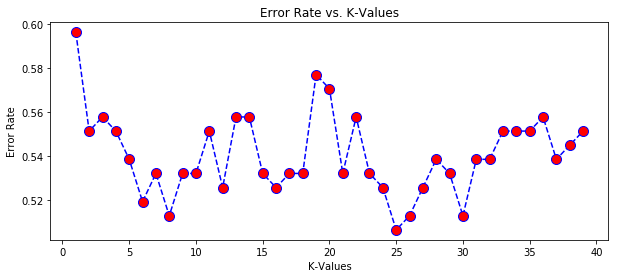

In [206]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [207]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_split, y_train_split)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [208]:
predict_knn = knn.predict(X_test_split)
print('Nilai akurasi knn  : ', accuracy_score(y_test_split, predict_knn))

Nilai akurasi knn  :  0.4935897435897436


In [209]:
predict_knn[0:20]

array([3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0],
      dtype=int64)

In [210]:
y_test_split.head(20)

166    3
375    1
594    0
639    2
677    3
499    0
307    0
230    1
57     0
396    3
55     0
134    1
272    4
289    0
389    0
673    1
632    0
728    3
162    0
164    0
Name: Diagnosis_HD, dtype: int64

In [211]:
knn.score(X_train_split ,y_train_split)

0.536115569823435

In [212]:
knn.score(X_test_split, y_test_split)

0.4935897435897436

In [213]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [214]:
print(classification_report(y_test_split, predict_knn))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        68
           1       0.34      0.45      0.39        40
           2       0.60      0.12      0.20        25
           3       0.43      0.17      0.24        18
           4       0.00      0.00      0.00         5

   micro avg       0.49      0.49      0.49       156
   macro avg       0.39      0.30      0.30       156
weighted avg       0.49      0.49      0.45       156



c:\users\aldo azali\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
# Print out confusion matrix
cmat = confusion_matrix(y_test_split, predict_knn)
print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

[[53 14  0  1  0]
 [18 18  2  2  0]
 [ 9 12  3  1  0]
 [ 9  6  0  3  0]
 [ 2  3  0  0  0]]
TP - True Negative 53
FP - False Positive 14
FN - False Negative 18
TP - True Positive 18
Accuracy Rate: 0.4551282051282051
Misclassification Rate: 0.20512820512820512


In [216]:
val_accuracy = []
for i in np.arange(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_split,y_train_split)
    y_predict_split = knn.predict(X_test_split)
    performance = np.mean(y_predict_split == y_test_split)
    val_accuracy.append(performance)

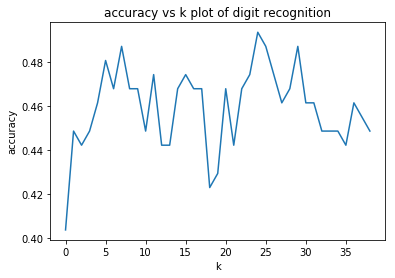

In [217]:
plt.title('accuracy vs k plot of digit recognition')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_accuracy)

### Model yang lain

In [ ]:
#TBD
X_test_split.shape

In [ ]:
X_test_split.head()

### Referensi

https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6